In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.datasets import fetch_openml

mnist = fetch_openml('mnist_784', version=1, as_frame=False)
X, y = mnist.data, mnist.target.astype(int)

print(f"Dataset shape: {X.shape}, Labels shape: {y.shape}")


Dataset shape: (70000, 784), Labels shape: (70000,)


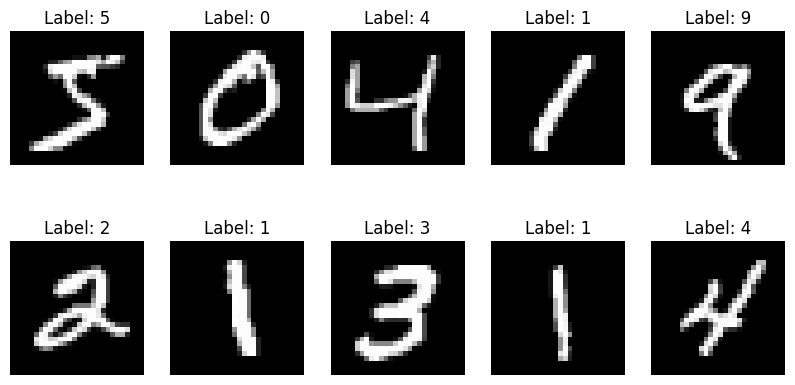

In [ ]:
fig, axes = plt.subplots(2, 5, figsize=(10, 5))
for i, ax in enumerate(axes.flat):
    ax.imshow(X[i].reshape(28, 28), cmap='gray')
    ax.set_title(f"Label: {y[i]}")
    ax.axis('off')
plt.show()


In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# scaling
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [ ]:
# train
svm_model = SVC(kernel='linear', C=1.0)
svm_model.fit(X_train, y_train)

# predictions
y_pred = svm_model.predict(X_test)


Model Accuracy: 0.9210


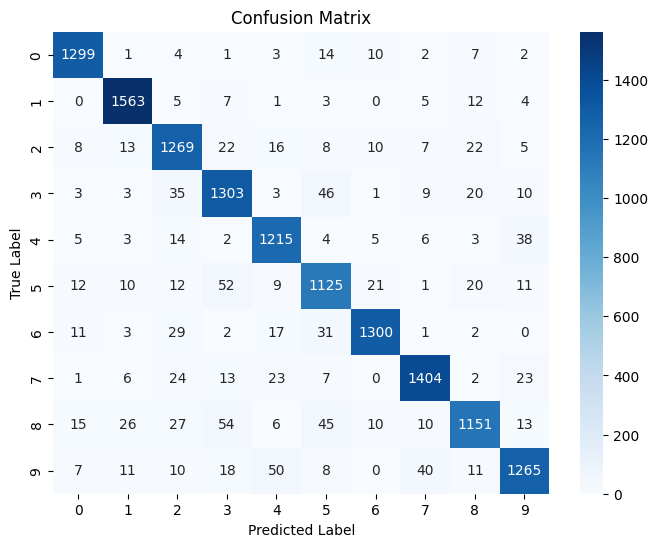

Classification Report:
              precision    recall  f1-score   support

           0       0.95      0.97      0.96      1343
           1       0.95      0.98      0.97      1600
           2       0.89      0.92      0.90      1380
           3       0.88      0.91      0.90      1433
           4       0.90      0.94      0.92      1295
           5       0.87      0.88      0.88      1273
           6       0.96      0.93      0.94      1396
           7       0.95      0.93      0.94      1503
           8       0.92      0.85      0.88      1357
           9       0.92      0.89      0.91      1420

    accuracy                           0.92     14000
   macro avg       0.92      0.92      0.92     14000
weighted avg       0.92      0.92      0.92     14000



In [ ]:
accuracy = accuracy_score(y_test, y_pred)
print(f"Model Accuracy: {accuracy:.4f}")

conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(8,6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=range(10), yticklabels=range(10))
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.title("Confusion Matrix")
plt.show()

print("Classification Report:")
print(classification_report(y_test, y_pred))
